In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

# Step 1: Download Stock Data
def fetch_and_clean_data(ticker, start_date, end_date):
    # Fetch data
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

    # Flatten multi-level columns
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [col[0] for col in data.columns]  # Use only the first level (e.g., 'Close')
    
    # Check if data is empty
    if data.empty:
        raise ValueError(f"No data available for {ticker} from {start_date} to {end_date}.")
    
    # Check for required columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not set(required_columns).issubset(data.columns):
        raise ValueError(f"Missing required columns. Available columns: {data.columns.tolist()}")

    # Select and validate columns
    data = data[required_columns]
    data = pd.DataFrame(data)  # Force into a DataFrame

    # Convert to numeric and handle missing values
    for col in ['Close', 'Volume']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data.dropna(subset=['Close', 'Volume'], inplace=True)

    # Check if valid data remains
    if data.empty:
        raise ValueError("All rows were removed after cleaning. Check data integrity.")

    return data


# Step 2: Add Technical Indicators
def add_technical_indicators(data):
    # Relative Strength Index (RSI)
    data['RSI'] = RSIIndicator(close=data['Close']).rsi()

    # Moving Average Convergence Divergence (MACD)
    macd = MACD(close=data['Close'])
    data['MACD'] = macd.macd_diff()

    # Bollinger Bands (High/Low)
    bollinger = BollingerBands(close=data['Close'])
    data['BB_High'] = bollinger.bollinger_hband()
    data['BB_Low'] = bollinger.bollinger_lband()

    data.dropna(inplace=True)  # Drop rows with NaN values

    return data

# Step 3: Prepare Data for Sequence Modeling
def create_sequences(data, features, seq_len):
    sequences, targets = [], []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i + seq_len, :])
        targets.append(data[i + seq_len, 0])  # Predicting 'Close' price
    return np.array(sequences), np.array(targets)

# Usage Example
if __name__ == "__main__":
    # Parameters
    ticker = "AAPL"
    start_date = "1990-01-01"  # Fetch data starting from January 1, 1990
    end_date = "2023-01-01"
    seq_len = 10

    # Fetch and preprocess data
    raw_data = fetch_and_clean_data(ticker, start_date, end_date)
    data_with_indicators = add_technical_indicators(raw_data)

    # Select features for modeling
    features = ['Close', 'Volume', 'RSI', 'MACD', 'BB_High', 'BB_Low']
    data_for_modeling = data_with_indicators[features].values

    # Create sequences
    X, y = create_sequences(data_for_modeling, features, seq_len)

    print("Data preparation complete.")
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


[*********************100%***********************]  1 of 1 completed

Data preparation complete.
Shape of X: (8272, 10, 6), Shape of y: (8272,)



*********************100%***********************]  1 of 1 completed

Data preparation complete.
Shape of X: (8272, 10, 6), Shape of y: (8272,)


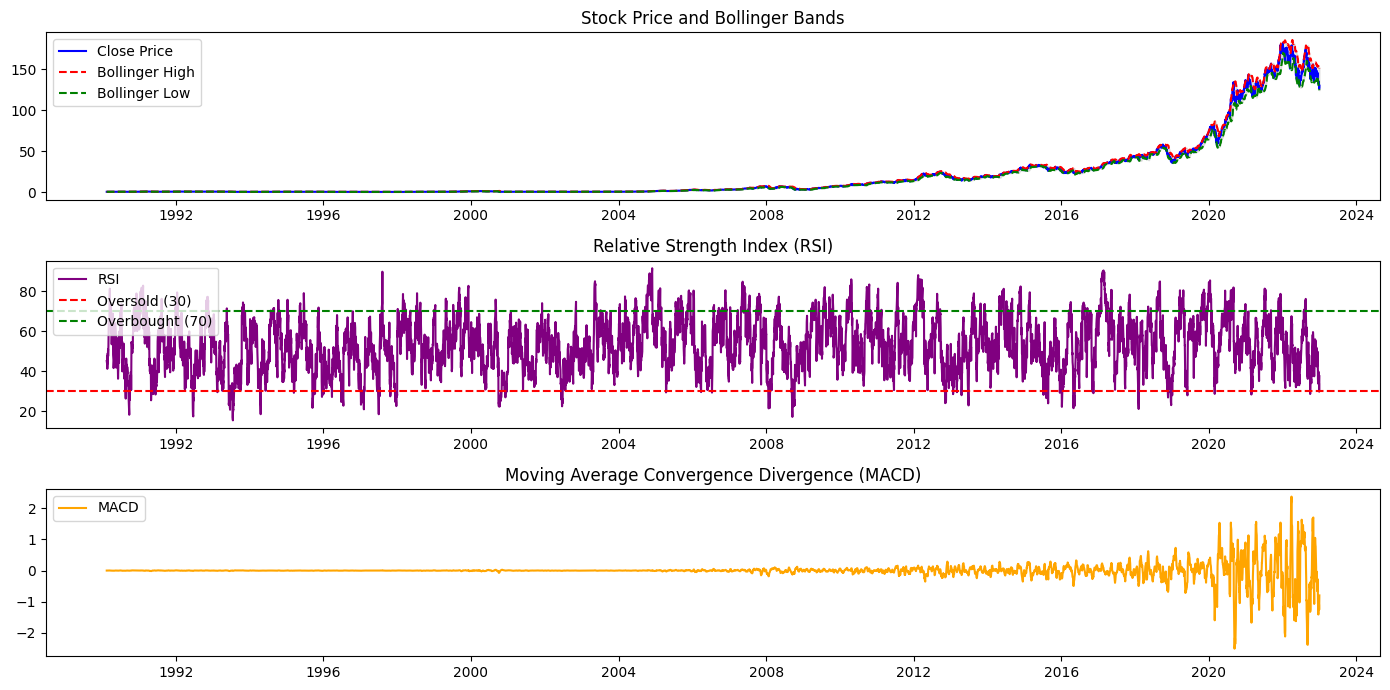

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

# Step 1: Download Stock Data
def fetch_and_clean_data(ticker, start_date, end_date):
    # Fetch data
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

    # Flatten multi-level columns
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [col[0] for col in data.columns]  # Use only the first level (e.g., 'Close')
    
    # Check if data is empty
    if data.empty:
        raise ValueError(f"No data available for {ticker} from {start_date} to {end_date}.")
    
    # Check for required columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not set(required_columns).issubset(data.columns):
        raise ValueError(f"Missing required columns. Available columns: {data.columns.tolist()}")

    # Select and validate columns
    data = data[required_columns]
    data = pd.DataFrame(data)  # Force into a DataFrame

    # Convert to numeric and handle missing values
    for col in ['Close', 'Volume']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data.dropna(subset=['Close', 'Volume'], inplace=True)

    # Check if valid data remains
    if data.empty:
        raise ValueError("All rows were removed after cleaning. Check data integrity.")

    return data


# Step 2: Add Technical Indicators
def add_technical_indicators(data):
    # Relative Strength Index (RSI)
    data['RSI'] = RSIIndicator(close=data['Close']).rsi()

    # Moving Average Convergence Divergence (MACD)
    macd = MACD(close=data['Close'])
    data['MACD'] = macd.macd_diff()

    # Bollinger Bands (High/Low)
    bollinger = BollingerBands(close=data['Close'])
    data['BB_High'] = bollinger.bollinger_hband()
    data['BB_Low'] = bollinger.bollinger_lband()

    data.dropna(inplace=True)  # Drop rows with NaN values

    return data

# Step 3: Prepare Data for Sequence Modeling
def create_sequences(data, features, seq_len):
    sequences, targets = [], []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i + seq_len, :])
        targets.append(data[i + seq_len, 0])  # Predicting 'Close' price
    return np.array(sequences), np.array(targets)

# Function to plot stock data and technical indicators
def plot_data(data):
    # Plotting Close Price and Bollinger Bands
    plt.figure(figsize=(14, 7))

    # Subplot 1: Close Price and Bollinger Bands
    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['BB_High'], label='Bollinger High', color='red', linestyle='--')
    plt.plot(data['BB_Low'], label='Bollinger Low', color='green', linestyle='--')
    plt.fill_between(data.index, data['BB_Low'], data['BB_High'], color='gray', alpha=0.2)
    plt.title('Stock Price and Bollinger Bands')
    plt.legend()

    # Subplot 2: RSI
    plt.subplot(3, 1, 2)
    plt.plot(data['RSI'], label='RSI', color='purple')
    plt.axhline(y=30, color='red', linestyle='--', label="Oversold (30)")
    plt.axhline(y=70, color='green', linestyle='--', label="Overbought (70)")
    plt.title('Relative Strength Index (RSI)')
    plt.legend()

    # Subplot 3: MACD
    plt.subplot(3, 1, 3)
    plt.plot(data['MACD'], label='MACD', color='orange')
    plt.title('Moving Average Convergence Divergence (MACD)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage Example
if __name__ == "__main__":
    # Parameters
    ticker = "AAPL"
    start_date = "1990-01-01"  # Fetch data starting from January 1, 1990
    end_date = "2023-01-01"
    seq_len = 10

    # Fetch and preprocess data
    raw_data = fetch_and_clean_data(ticker, start_date, end_date)
    data_with_indicators = add_technical_indicators(raw_data)

    # Select features for modeling
    features = ['Close', 'Volume', 'RSI', 'MACD', 'BB_High', 'BB_Low']
    data_for_modeling = data_with_indicators[features].values

    # Create sequences
    X, y = create_sequences(data_for_modeling, features, seq_len)

    print("Data preparation complete.")
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

    # Visualize the data
    plot_data(data_with_indicators)


In [8]:
#Normalize Features:

#Use MinMaxScaler to scale features between 0 and 1.
#Split Data:

#Divide data into training and testing sets (e.g., 80% training, 20% testing).
#Prepare for PyTorch:

#Convert normalized data into PyTorch tensors.
#Create DataLoader objects for training and testing datasets.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

# Step 1: Download Stock Data
def fetch_and_clean_data(ticker, start_date, end_date):
    # Fetch data
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

    # Flatten multi-level columns
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [col[0] for col in data.columns]  # Use only the first level (e.g., 'Close')
    
    # Check if data is empty
    if data.empty:
        raise ValueError(f"No data available for {ticker} from {start_date} to {end_date}.")
    
    # Check for required columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not set(required_columns).issubset(data.columns):
        raise ValueError(f"Missing required columns. Available columns: {data.columns.tolist()}")

    # Select and validate columns
    data = data[required_columns]
    data = pd.DataFrame(data)  # Force into a DataFrame

    # Convert to numeric and handle missing values
    for col in ['Close', 'Volume']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data.dropna(subset=['Close', 'Volume'], inplace=True)

    # Check if valid data remains
    if data.empty:
        raise ValueError("All rows were removed after cleaning. Check data integrity.")

    return data


# Step 2: Add Technical Indicators
def add_technical_indicators(data):
    # Relative Strength Index (RSI)
    data['RSI'] = RSIIndicator(close=data['Close']).rsi()

    # Moving Average Convergence Divergence (MACD)
    macd = MACD(close=data['Close'])
    data['MACD'] = macd.macd_diff()

    # Bollinger Bands (High/Low)
    bollinger = BollingerBands(close=data['Close'])
    data['BB_High'] = bollinger.bollinger_hband()
    data['BB_Low'] = bollinger.bollinger_lband()

    data.dropna(inplace=True)  # Drop rows with NaN values

    return data


# Step 3: Prepare Data for Sequence Modeling
def create_sequences(data, features, seq_len):
    sequences, targets = [], []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i + seq_len, :])
        targets.append(data[i + seq_len, 0])  # Predicting 'Close' price
    return np.array(sequences), np.array(targets)


# Normalize the data using MinMaxScaler
def normalize_data(data, features):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[features])
    return scaled_data, scaler


# Prepare PyTorch tensors and DataLoader
def prepare_pytorch_data(X, y, batch_size=64):
    # Convert data to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Create Dataset and DataLoader
    dataset = TensorDataset(X_tensor, y_tensor)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


# Usage Example
if __name__ == "__main__":
    # Parameters
    ticker = "AAPL"
    start_date = "1990-01-01"  # Fetch data starting from January 1, 1990
    end_date = "2023-01-01"
    seq_len = 10
    batch_size = 64

    # Fetch and preprocess data
    raw_data = fetch_and_clean_data(ticker, start_date, end_date)
    data_with_indicators = add_technical_indicators(raw_data)

    # Select features for modeling
    features = ['Close', 'Volume', 'RSI', 'MACD', 'BB_High', 'BB_Low']
    data_for_modeling = data_with_indicators[features].values

    # Normalize features
    scaled_data, scaler = normalize_data(data_with_indicators, features)

    # Create sequences
    X, y = create_sequences(scaled_data, features, seq_len)

    # Prepare PyTorch DataLoaders
    train_loader, test_loader = prepare_pytorch_data(X, y, batch_size)

    print("Data preparation complete.")
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")
    print(f"Training DataLoader: {len(train_loader)} batches")
    print(f"Testing DataLoader: {len(test_loader)} batches")


[*********************100%***********************]  1 of 1 completed

Data preparation complete.
Shape of X: (8272, 10, 6), Shape of y: (8272,)
Training DataLoader: 104 batches
Testing DataLoader: 26 batches


In [14]:
#Define Transformer Architecture
import torch
import torch.nn as nn

class StockPriceTransformer(nn.Module):
    def __init__(self, input_dim, embedding_dim, num_heads, num_layers, seq_len):
        super(StockPriceTransformer, self).__init__()
        
        # Embedding Layer to map input features to embedding space
        self.embedding = nn.Linear(input_dim, embedding_dim)
        
        # Transformer Encoder
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_dim,  # Size of the embedding dimension
            nhead=num_heads,        # Number of attention heads
            batch_first=True         # Use batch_first=True for better performance
        )
        self.transformer_encoder = nn.TransformerEncoder(
            self.transformer_encoder_layer, num_layers=num_layers
        )
        
        # Output layer to predict stock price (Close)
        self.output_layer = nn.Linear(embedding_dim, 1)  # We predict 1 value: Close price
        
    def forward(self, x):
        # Step 1: Embed input features
        x = self.embedding(x)  # Shape: [batch_size, seq_len, embedding_dim]
        
        # Step 2: Pass through Transformer Encoder
        x = self.transformer_encoder(x)
        
        # Step 3: Take the output of the last time step (seq_len - 1) for prediction
        x = x[:, -1, :]  # Shape: [batch_size, embedding_dim]
        
        # Step 4: Pass through output layer to predict Close price
        output = self.output_layer(x)  # Shape: [batch_size, 1]
        
        return output

# Hyperparameters
input_dim = 6  # Number of features (Close, Volume, RSI, MACD, BB_High, BB_Low)
embedding_dim = 64  # Size of embedding space
num_heads = 4  # Number of attention heads
num_layers = 2  # Number of transformer layers
seq_len = 10  # Sequence length (timesteps per sequence)

# Create the model
model = StockPriceTransformer(input_dim, embedding_dim, num_heads, num_layers, seq_len)

# Print the model architecture
print(model)


StockPriceTransformer(
  (embedding): Linear(in_features=6, out_features=64, bias=True)
  (transformer_encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
    )
    (linear1): Linear(in_features=64, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=64, bias=True)
    (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_fe

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Assuming the code for fetching data, adding indicators, and creating sequences is already done above
# Now let's focus on data normalization and training split.

# Normalize the data using MinMaxScaler
scaled_data, scaler = normalize_data(data_with_indicators, features)

# Create sequences
X, y = create_sequences(scaled_data, features, seq_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model definition (assuming the StockPriceTransformer class is already defined)
input_dim = 6  # Number of features (Close, Volume, RSI, MACD, BB_High, BB_Low)
embedding_dim = 64
num_heads = 4
num_layers = 2
seq_len = 10

model = StockPriceTransformer(input_dim, embedding_dim, num_heads, num_layers, seq_len)

# Loss function and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 50  # Number of epochs for training
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    
    epoch_loss = 0  # To track the loss for this epoch
    
    # Iterate through the training data
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients for each batch
        
        # Forward pass: Compute model predictions
        predictions = model(inputs)
        
        # Compute loss
        loss = criterion(predictions, targets.unsqueeze(1))  # Unsqueeze to match the shape
        
        # Backward pass: Compute gradients and update weights
        loss.backward()
        
        # Update model weights
        optimizer.step()
        
        # Accumulate loss for this batch
        epoch_loss += loss.item()
    
    # Print the training loss for the current epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")

# After training, you can evaluate the model on the test set:
model.eval()  # Set the model to evaluation mode

test_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        predictions = model(inputs)
        loss = criterion(predictions, targets.unsqueeze(1))  # Unsqueeze to match the shape
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"Test Loss: {avg_test_loss:.4f}")


Epoch [1/50], Loss: 0.1405
Epoch [2/50], Loss: 0.0045
Epoch [3/50], Loss: 0.0011
Epoch [4/50], Loss: 0.0005
Epoch [5/50], Loss: 0.0003
Epoch [6/50], Loss: 0.0002
Epoch [7/50], Loss: 0.0002
Epoch [8/50], Loss: 0.0002
Epoch [9/50], Loss: 0.0001
Epoch [10/50], Loss: 0.0001
Epoch [11/50], Loss: 0.0001
Epoch [12/50], Loss: 0.0001
Epoch [13/50], Loss: 0.0001
Epoch [14/50], Loss: 0.0001
Epoch [15/50], Loss: 0.0001
Epoch [16/50], Loss: 0.0001
Epoch [17/50], Loss: 0.0001
Epoch [18/50], Loss: 0.0001
Epoch [19/50], Loss: 0.0001
Epoch [20/50], Loss: 0.0001
Epoch [21/50], Loss: 0.0003
Epoch [22/50], Loss: 0.0001
Epoch [23/50], Loss: 0.0001
Epoch [24/50], Loss: 0.0001
Epoch [25/50], Loss: 0.0001
Epoch [26/50], Loss: 0.0001
Epoch [27/50], Loss: 0.0001
Epoch [28/50], Loss: 0.0001
Epoch [29/50], Loss: 0.0001
Epoch [30/50], Loss: 0.0001
Epoch [31/50], Loss: 0.0001
Epoch [32/50], Loss: 0.0001
Epoch [33/50], Loss: 0.0002
Epoch [34/50], Loss: 0.0001
Epoch [35/50], Loss: 0.0001
Epoch [36/50], Loss: 0.0001
E

Test MSE: 0.1312
Test RMSE: 0.3622
Test R²: -0.8146


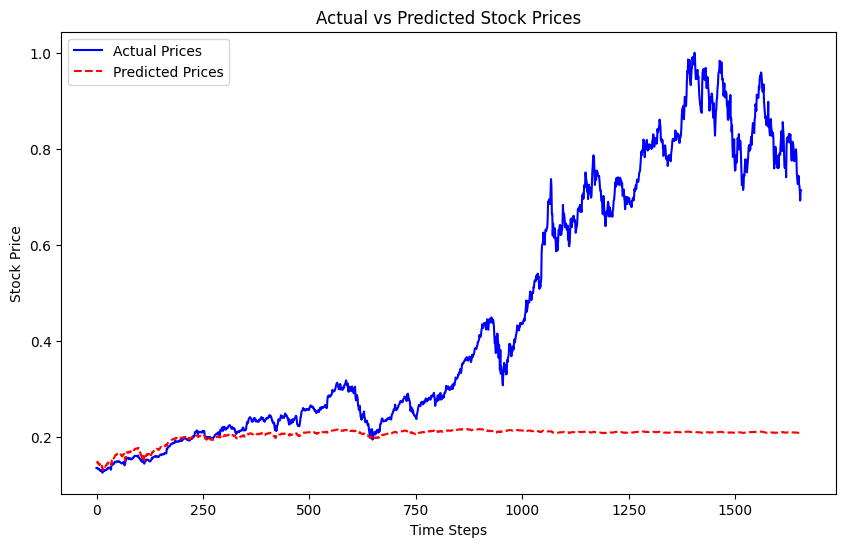

In [10]:
#Step 6: Model Evaluation.Evaluate on Test Set:Compute predictions on test data without updating model weights.Compare actual and predicted values using evaluation metrics like RMSE and R².
#Visualization:Plot actual vs. predicted prices for qualitative analysis.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import torch

# Set the model to evaluation mode
model.eval()

# Initialize lists to store actual and predicted values for the test set
y_actual = []
y_pred = []

# Compute predictions on test data without updating model weights
with torch.no_grad():
    for inputs, targets in test_loader:
        # Get model predictions
        predictions = model(inputs)
        
        # Append actual and predicted values to lists
        y_actual.extend(targets.numpy())
        y_pred.extend(predictions.numpy())

# Convert lists to numpy arrays
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_pred)
print(f"Test MSE: {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse:.4f}")

# Calculate R² Score
r2 = r2_score(y_actual, y_pred)
print(f"Test R²: {r2:.4f}")

# Visualization: Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


In [12]:
import pandas as pd
import torch

# Ensure y_actual and y_pred are 1-dimensional and convert tensors to NumPy arrays if necessary
y_actual = y_actual.cpu().numpy() if isinstance(y_actual, torch.Tensor) else y_actual
y_pred = y_pred.cpu().numpy() if isinstance(y_pred, torch.Tensor) else y_pred

# Save actual and predicted values to CSV
results_df = pd.DataFrame({
    'Actual Prices': y_actual.flatten(),
    'Predicted Prices': y_pred.flatten()
})

# Save to a CSV file
results_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

# Save the trained model weights
torch.save(model.state_dict(), 'trained_model.pth')
print("Model saved to 'trained_model.pth'")


Predictions saved to 'predictions.csv'
Model saved to 'trained_model.pth'
